<a href="https://colab.research.google.com/github/ArbiWicaksono/Projek-Fisika/blob/main/Orbit%20Bumi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Orbit Bumi Mengelilingi Matahari**
Persamaan gerak Bumi adalah sebagai berikut
$$
\frac{dv_x}{dt} = -p\frac{x}{r^3} \qquad(1)
$$
$$
\frac{dv_y}{dt} = -p\frac{y}{r^3} \qquad(2)
$$
Dengan

$r = \sqrt{x^2+y^2}$

$p = GM = 1,328$   $\times 10^{20} Nm^2kg^{-1}$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [ ]:
#parameter
p = 1.328 * 1e20

In [ ]:
# model persamaan diferensial
def dSdt(t, S, p):            #dSdt berisi t, vektor array S, dan parameter
  x, y, vx, vy = S            # array S berisi variabel posisi dan kecepatan
  r = np.sqrt(x**2 + y**2)
  return [vx,                 #Turunan array S
          vy,
          -p * x/r**3,
          -p * y/r**3]

In [ ]:
# kondisi awal / initial conditions
x0 = 1.496 * 1e11
y0 = 0
v0x = 0
v0y = 2.94 * 1e4

# merapikan kondisi awal
S0 = [x0, y0, v0x, v0y]

# pewaktuan
T0 = 0
Tt = 0.2999 * 10**8

In [ ]:
sol = solve_ivp(dSdt, t_span=(T0, Tt),
                y0=S0, method="DOP853", rtol=10e-13, args=(p, ))
#DOP853 metode integrasi numerik untuk masalah orbit, args berisi parameter

t = sol.t
x = sol.y[0]
y = sol.y[1]
vx = sol.y[2]
vy = sol.y[3]

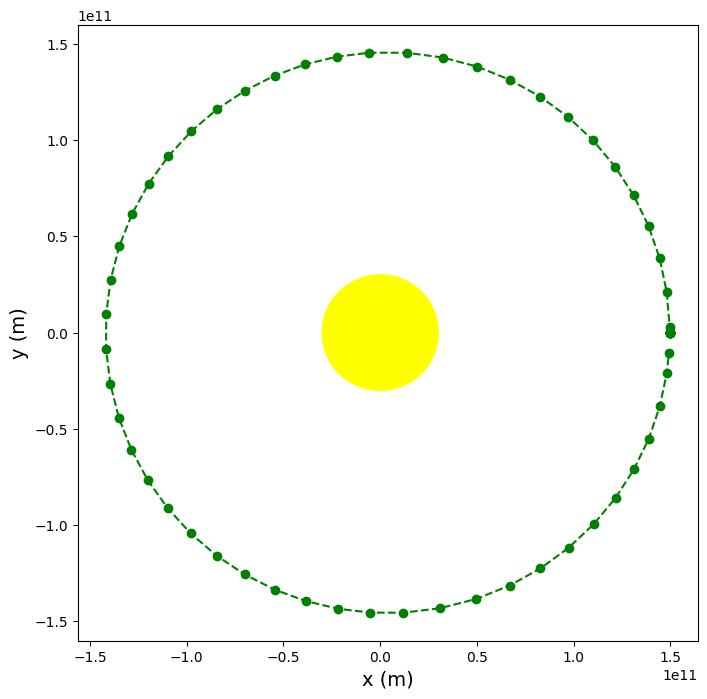

In [ ]:
# plotting
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

# matahari
sun = plt.Circle((0, 0), 3*10**10, color="yellow")
ax.add_patch(sun)

# bumi
ax.plot(x, y, "go--")
ax.set_xlabel("x (m)", fontsize=14)
ax.set_ylabel("y (m)", fontsize=14)

plt.show()

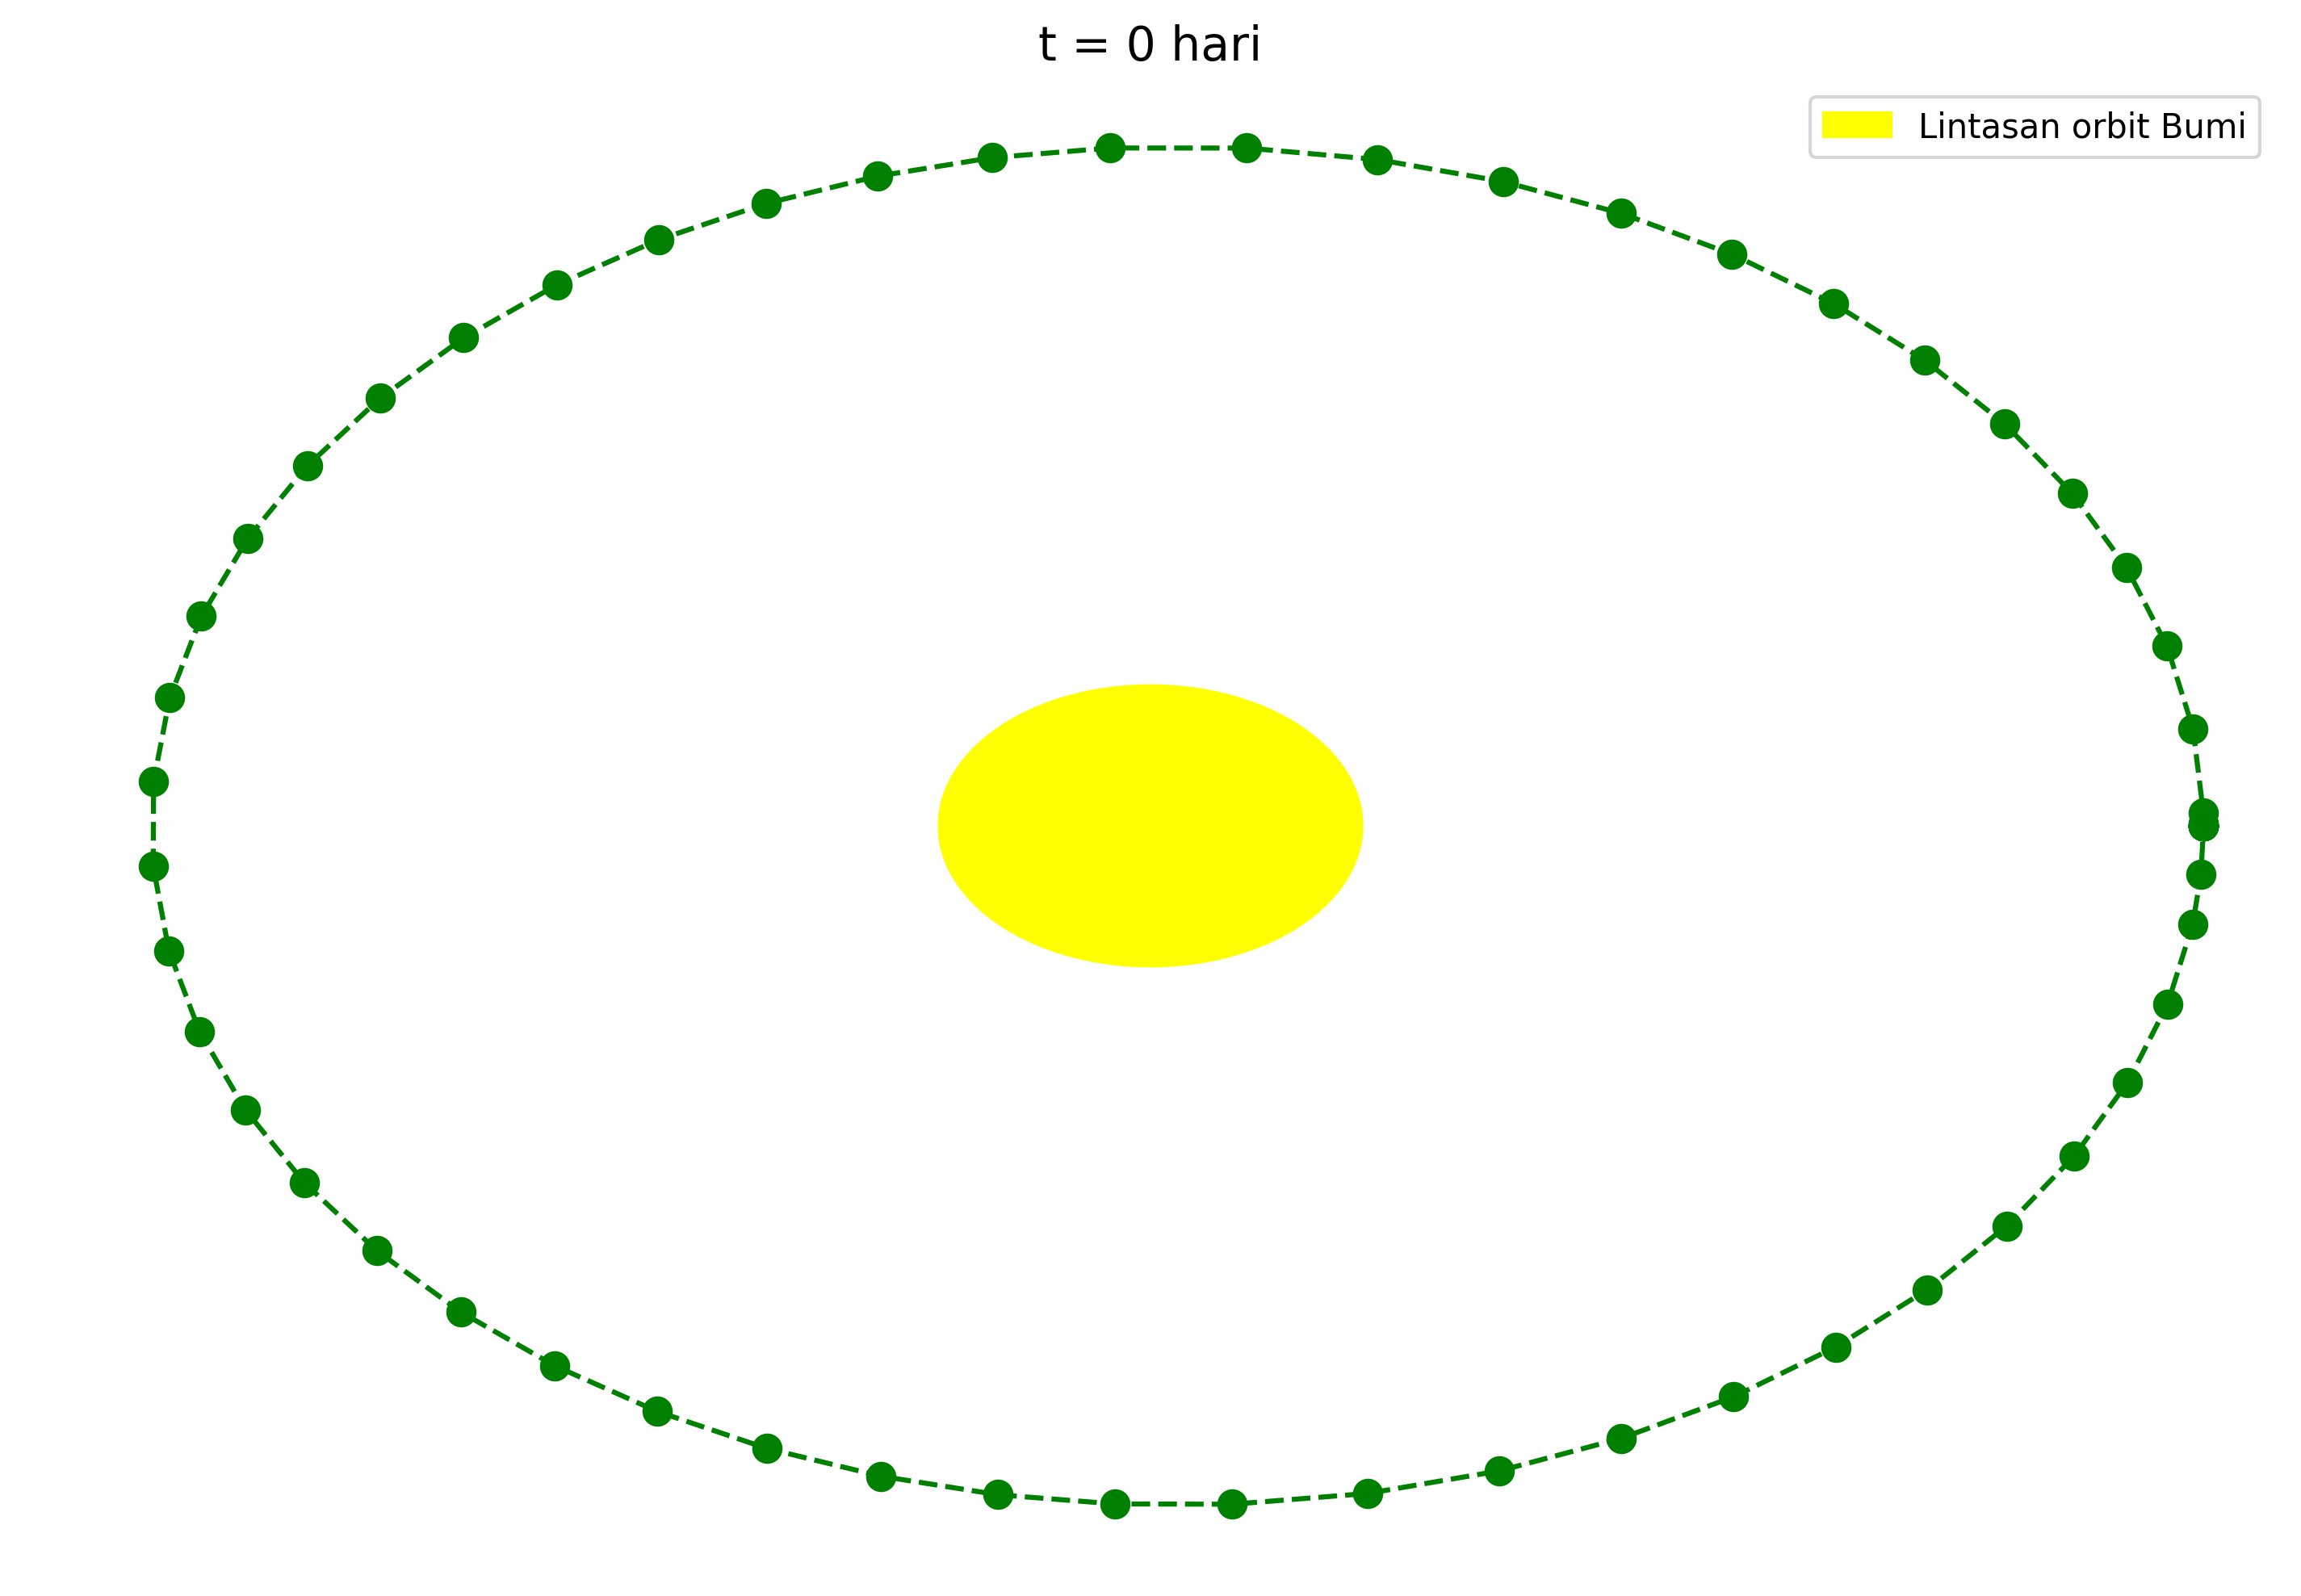

In [ ]:
# membuat animasi
from matplotlib import animation
from matplotlib.animation import FuncAnimation

fig = plt.figure(dpi=300, figsize=(12, 8))
ax = fig.add_subplot(111)

sun = plt.Circle((0, 0), 3*10**10, color="yellow")
ax.add_patch(sun)

ax.set_xlim(-1.6*1e11, 1.6*1e11)
ax.set_ylim(-1.6*1e11, 1.6*1e11)

ax.set_axis_off()

txt_title = ax.set_title("", fontsize=14)
line1, = ax.plot([], [], "go--", markersize=8)

ax.legend(["Lintasan orbit Bumi"])

# dummies list
xx = []
yy = []

def draw(i):
  xx.append(x[i])
  yy.append(y[i])
  line1.set_data(xx, yy)
  txt_title.set_text("t = {0:0.0f} hari".format(i*6))
  return (line1, )

earth = FuncAnimation(fig=fig, frames=62, func=draw, interval=200)

from IPython.display import HTML
HTML(earth.to_html5_video())